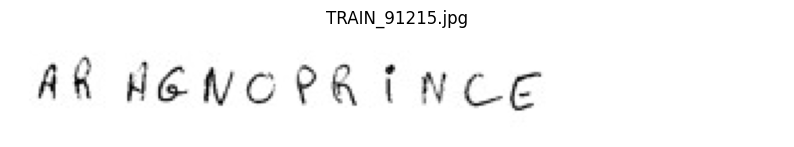

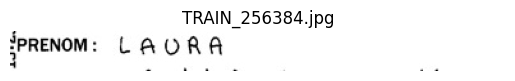

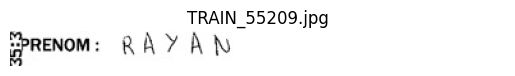

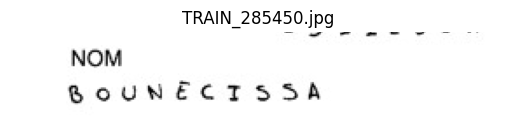

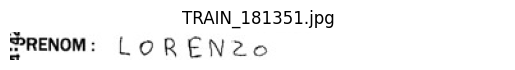

In [27]:
import os
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

# Function to display random images
def display_random_images(folder, num_samples=5):
    image_files = [f for f in os.listdir(folder) if f.endswith('.jpg') or f.endswith('.png')]
    
    if num_samples > len(image_files):
        raise ValueError("Sample larger than population or is negative")
    
    random_samples = random.sample(image_files, num_samples)
    
    plt.figure(figsize=(10, 10))
    for img_file in random_samples:
        img_path = os.path.join(folder, img_file)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        plt.imshow(image, cmap='gray')
        plt.title(img_file)
        plt.axis('off')  # Hide axes
        plt.show()

# Example usage
display_random_images('C:/Users/mijay/OneDrive/Desktop/AIProjects/Hand-Writing-Recognition-clean/Hand-Writing-Recognition-clean/data/processed/sample_train_v2', num_samples=5)


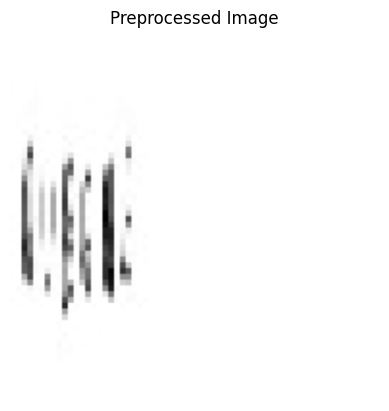

In [28]:
def preprocess_image(image_path, output_size=(128, 128)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image with a suitable interpolation
    image_resized = cv2.resize(image, output_size, interpolation=cv2.INTER_AREA)
    return image_resized

# Function to display an image using Matplotlib
def display_image(image, title="Processed Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage
image_path = 'C:/Users/mijay/OneDrive/Desktop/AIProjects/Hand-Writing-Recognition-clean/Hand-Writing-Recognition-clean/data/processed/preprocessed_images/TRAIN_46382.jpg'  # Replace with your actual image path
processed_image = preprocess_image(image_path)
display_image(processed_image, title="Preprocessed Image")


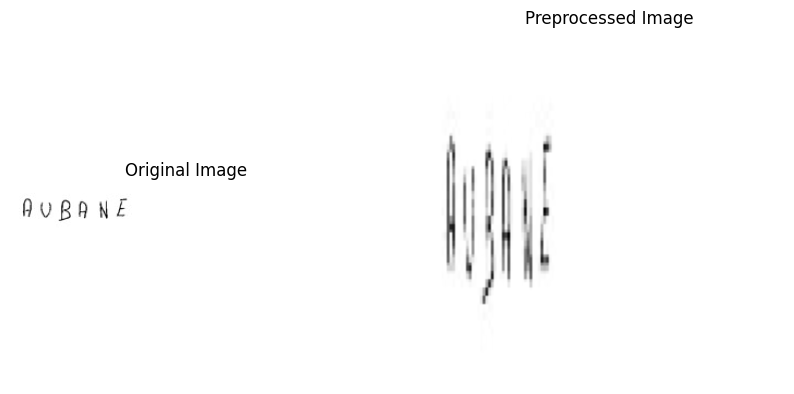

In [29]:
def preprocess_image(image_path, output_size=(128, 128)):
    # Read the original image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image with a suitable interpolation
    image_resized = cv2.resize(image, output_size, interpolation=cv2.INTER_AREA)
    return image_resized

def display_comparison(original_path, processed_path):
    # Read the original and processed images
    original_image = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
    processed_image = preprocess_image(original_path)

    # Display both images side by side
    plt.figure(figsize=(10, 5))
    
    # Show original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    # Show processed image
    plt.subplot(1, 2, 2)
    plt.imshow(processed_image, cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')
    
    plt.show()

# Example usage
image_name = 'TRAIN_46382.jpg'  # Example image name
original_path = f'C:/Users/mijay/OneDrive/Desktop/AIProjects/Hand-Writing-Recognition-clean/Hand-Writing-Recognition-clean/data/processed/sample_train_v2/TRAIN_46382.JPG'
processed_path = f'C:/Users/mijay/OneDrive/Desktop/AIProjects/Hand-Writing-Recognition-clean/Hand-Writing-Recognition-clean/data/processed/preprocessed_images/TRAIN_46382.jpg'

display_comparison(original_path, processed_path)


In [ ]:
import pytesseract

# Set up the path to the Tesseract executable if needed (Windows example)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def preprocess_image(image_path, output_size=(300, 100)):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize to make the text larger for OCR processing
    image_resized = cv2.resize(image, output_size, interpolation=cv2.INTER_CUBIC)
    
    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(image_resized, (5, 5), 0)
    
    # Apply adaptive thresholding for enhanced contrast on thin fonts
    thresh = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
    )
    
    return thresh

def extract_text_from_image(image):
    # Use Tesseract with specific configuration settings for single-word text
    config = '--oem 3 --psm 8'  # Treat the image as a single word
    text = pytesseract.image_to_string(image, config=config)
    return text

def process_and_extract_text(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    # Extract text using Tesseract OCR
    text = extract_text_from_image(preprocessed_image)
    
    # Display the preprocessed image to see the contrast
    cv2.imshow("Preprocessed Image", preprocessed_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return text

# Example usage with the provided sample image path
image_path = 'C:/Users/mijay/OneDrive/Desktop/AIProjects/Hand-Writing-Recognition-clean/Hand-Writing-Recognition-clean/data/processed/preprocessed_images/TRAIN_46382.jpg'  # Update to the file path of the uploaded image if needed
extracted_text = process_and_extract_text(image_path)
print("Extracted Text:", extracted_text)